In [745]:
################################################################################
# Author 1:      Lukas Umfahrer
# MatNr 1:       12337160
# Author 2:      Firstname Lastname
# MatNr 2:       01234567
# Author 3:      Firstname Lastname
# MatNr 3:       01234567
# File:          assignment2.ipynb
# Description: ... short description of the file ...
# Comments:    ... comments for the tutors ...
#              ... can be multiline ...
################################################################################


<center>
    <h1>Assignment 2</h1>
</center>

#### Imports

In [746]:
import pandas as pa
import matplotlib.pyplot as plt
import plotly as pl
import numpy as np
import pycountry as py
import pycountry_convert as pyco

## Part 1: Data Analysis & Visualization Code - Required Plots

### Line plots: Visualize data over time (4P)

In [747]:
data = pa.read_csv("OECD.ELS.HD,DSD_HEALTH_LVNG@DF_HEALTH_LVNG,+all.csv", delimiter = ",")   # Daten einlesen
data

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Unnamed: 5,FREQ,Unnamed: 7,MEASURE,Unnamed: 9,...,TIME_PERIOD,Unnamed: 19,OBS_VALUE,Unnamed: 21,OBS_STATUS,Unnamed: 23,UNIT_MULT,Unnamed: 25,DECIMALS,Unnamed: 27
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1961,NaN,110.2,NaN,A,NaN,0,NaN,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1962,NaN,109.1,NaN,A,NaN,0,NaN,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1963,NaN,110.7,NaN,A,NaN,0,NaN,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1964,NaN,114.2,NaN,A,NaN,0,NaN,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1965,NaN,113.0,NaN,A,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33528,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OVRGHT,NaN,...,2014,NaN,46.7,NaN,A,NaN,0,NaN,NaN,NaN
33529,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OVRGHT,NaN,...,2019,NaN,48.8,NaN,A,NaN,0,NaN,NaN,NaN
33530,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OBS,NaN,...,2008,NaN,11.5,NaN,A,NaN,0,NaN,NaN,NaN
33531,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OBS,NaN,...,2014,NaN,14.8,NaN,A,NaN,0,NaN,NaN,NaN


In [748]:
#figure, axis = plt.subplots()

#data_aut = data[data["REF_AREA"]=="AUT"]    # Nur Daten aus dem Land AUT verwenden
#data_usa = data[data["REF_AREA"]=="USA"]    # Nur Daten aus dem Land USA verwenden
#data_deu = data[data["REF_AREA"]=="DEU"]    # Nur Daten aus dem Land DEU verwenden
#data_ita = data[data["REF_AREA"]=="ITA"]    # Nur Daten aus dem Land ITA verwenden

#data_aut_men = data_aut[data_aut["SEX"]=="M"]   # Daten von allen aus AUT Männern damit der Graph am Ende übersichtlicher ist
#data_usa_men = data_usa[data_usa["SEX"]=="M"]   # Daten von allen aus USA Männern damit der Graph am Ende übersichtlicher ist
#data_deu_men = data_deu[data_deu["SEX"]=="M"]   # Daten von allen aus DEU Männern damit der Graph am Ende übersichtlicher ist
#data_ita_men = data_ita[data_ita["SEX"]=="M"]   # Daten von allen aus ITA Männern damit der Graph am Ende übersichtlicher ist

#data_aut_men_mean = data_aut_men.groupby("TIME_PERIOD")["OBS_VALUE"].mean()     # Durchschnitt der Männer aus AUT aus einem Jahr berechnen
#data_usa_men_mean = data_usa_men.groupby("TIME_PERIOD")["OBS_VALUE"].mean()     # Durchschnitt der Männer aus USA aus einem Jahr berechnen
#data_deu_men_mean = data_deu_men.groupby("TIME_PERIOD")["OBS_VALUE"].mean()     # Durchschnitt der Männer aus DEU aus einem Jahr berechnen
#data_ita_men_mean = data_ita_men.groupby("TIME_PERIOD")["OBS_VALUE"].mean()     # Durchschnitt der Männer aus ITA aus einem Jahr berechnen


# AUT Graph
#ys_aut= data_aut_men_mean.values   # Werte
#xs_aut = data_aut_men_mean.index    # Jahre

#axis.plot(xs_aut, ys_aut,
#          marker="o",
#          markersize="3",
#          markeredgecolor="red",
#          label="AUT")

# USA Graph
#ys_usa = data_usa_men_mean.values   # Werte
#xs_usa = data_usa_men_mean.index    #Jahre

#axis.plot(xs_usa, ys_usa,
#          marker="^",
#          markersize="3",
#          markeredgecolor="green",
#          label="USA")

# DEU Graph
#ys_deu = data_deu_men_mean.values   # Werte
#xs_deu = data_deu_men_mean.index    #Jahre

#axis.plot(xs_deu, ys_deu,
#          marker="s",
#          markersize="3",
#          markeredgecolor="magenta",
#          label="DEU")

# ITA Graph
#ys_ita= data_ita_men_mean.values   # Werte
#xs_ita = data_ita_men_mean.index    # Jahre

#axis.plot(xs_ita, ys_ita,
#          marker="*",
#          markersize="3",
#          markeredgecolor="black",
#          label="ITA")


#axis.set_xlabel("Year")
#axis.set_ylabel("Mean of the Obesityvalues")
#axis.legend()
#plt.title("Mean of mens obesity per year")
#plt.grid(True)


### Bar charts: Compare data from different countries (4P)

In [749]:
data = pa.read_csv("OECD.ELS.HD,DSD_HEALTH_LVNG@DF_HEALTH_LVNG,+all.csv", delimiter = ",")   # Daten einlesen
data

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Unnamed: 5,FREQ,Unnamed: 7,MEASURE,Unnamed: 9,...,TIME_PERIOD,Unnamed: 19,OBS_VALUE,Unnamed: 21,OBS_STATUS,Unnamed: 23,UNIT_MULT,Unnamed: 25,DECIMALS,Unnamed: 27
0,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1961,NaN,110.2,NaN,A,NaN,0,NaN,NaN,NaN
1,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1962,NaN,109.1,NaN,A,NaN,0,NaN,NaN,NaN
2,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1963,NaN,110.7,NaN,A,NaN,0,NaN,NaN,NaN
3,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1964,NaN,114.2,NaN,A,NaN,0,NaN,NaN,NaN
4,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,USA,NaN,A,NaN,FTS,NaN,...,1965,NaN,113.0,NaN,A,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33528,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OVRGHT,NaN,...,2014,NaN,46.7,NaN,A,NaN,0,NaN,NaN,NaN
33529,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OVRGHT,NaN,...,2019,NaN,48.8,NaN,A,NaN,0,NaN,NaN,NaN
33530,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OBS,NaN,...,2008,NaN,11.5,NaN,A,NaN,0,NaN,NaN,NaN
33531,DATAFLOW,OECD.ELS.HD:DSD_HEALTH_LVNG@DF_HEALTH_LVNG(1.0),NaN,I,BGR,NaN,A,NaN,SP_OBS,NaN,...,2014,NaN,14.8,NaN,A,NaN,0,NaN,NaN,NaN


Text(0, 0.5, 'Mean of the Obesityvalues')

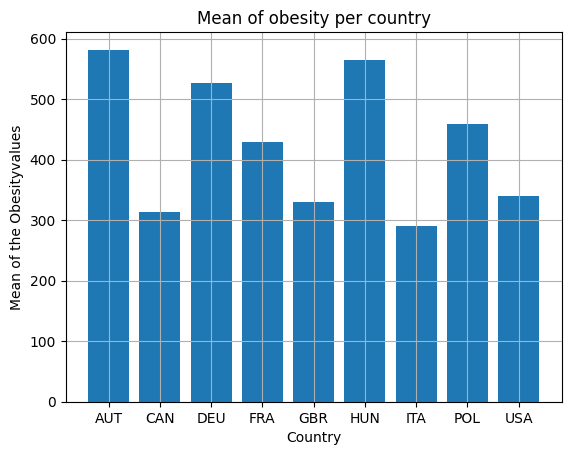

In [750]:
figure, axis = plt.subplots()

countrys_data = data[data["REF_AREA"].isin(["AUT", "DEU", "ITA", "USA", "CAN", "POL", "HUN", "FRA", "GBR"])]    # Daten von den gewollten Ländern

mean_per_country = countrys_data.groupby("REF_AREA")["OBS_VALUE"].mean()    # Durchschnitt der einzelnen Länder berechnen

ys = mean_per_country.values    # Werte
xs = mean_per_country.index     # Länder

plt.bar(xs, ys)

plt.title("Mean of obesity per country")
plt.grid(True)
axis.set_xlabel("Country")
axis.set_ylabel("Mean of the Obesityvalues")

### Scatter plots: Visualize the relationship between different variables (7P)